In [1]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
import sklearn

from udonpred_benchmarking.constants import DATA_DIR
from udonpred_benchmarking.plots import METHODS, set_theme

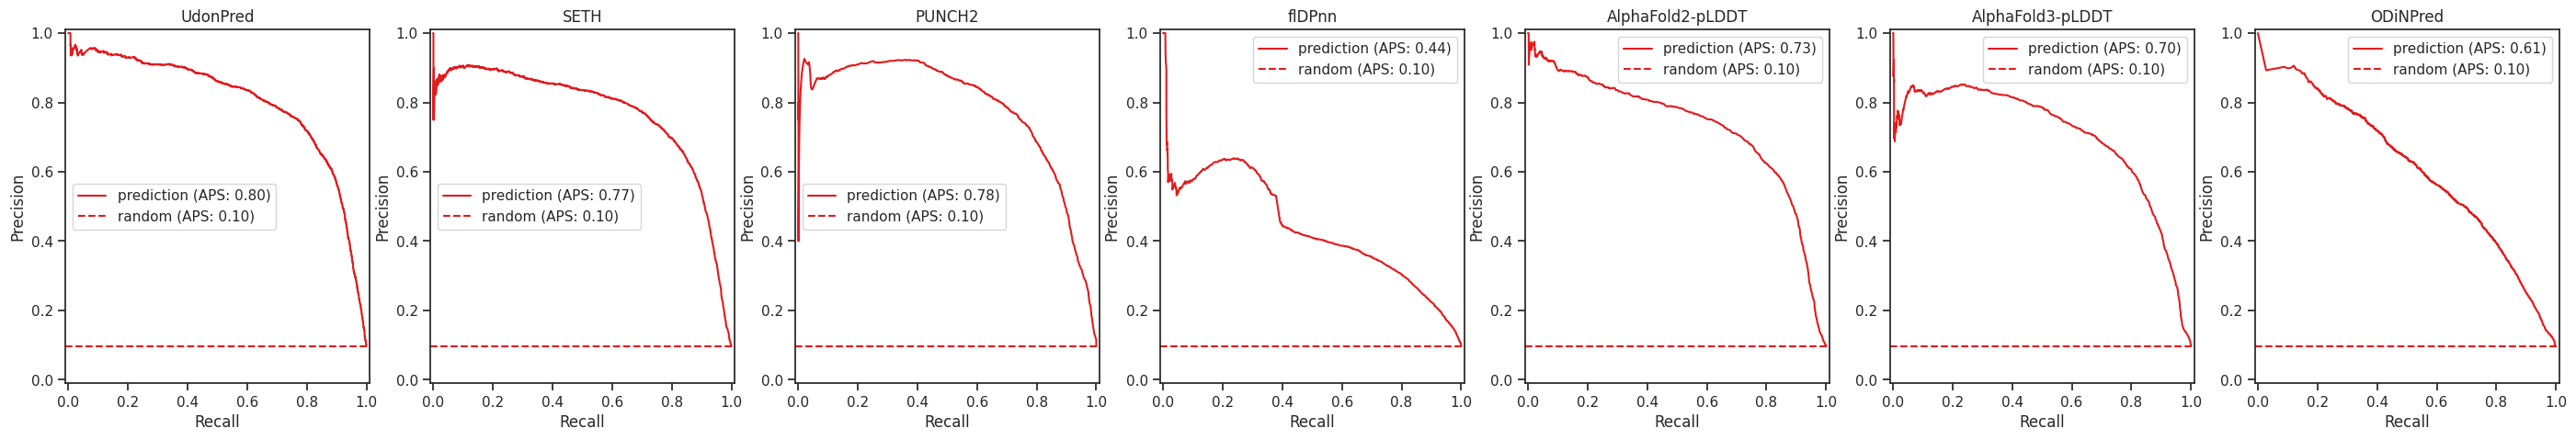

In [2]:
residue_df = pl.read_csv(DATA_DIR / "per_residue_predictions.csv")
set_theme()
# https://stats.stackexchange.com/questions/251175/what-is-baseline-in-precision-recall-curve
random_baseline = (residue_df.group_by("pscores_binary").len().filter(pl.col("pscores_binary") == 1).select("len") / residue_df.shape[0]).item()

fig, axs = plt.subplots(1, len(METHODS), figsize=(35, 5))

for method, ax in zip(METHODS, axs):
    precision, recall, _= sklearn.metrics.precision_recall_curve(residue_df["pscores_binary"], residue_df[f"{method}_continuous"])
    aps = sklearn.metrics.average_precision_score(residue_df["pscores_binary"], residue_df[f"{method}_continuous"])
    plt.sca(ax)
    ax.plot(recall, precision, label=f"prediction (APS: {aps:.2f})")
    ax.set_title(method)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_xlim([-.01, 1.01])
    ax.set_ylim([-.01, 1.01])
    plt.axhline(random_baseline, linestyle="--", label=f"random (APS: {random_baseline:.2f})")
    ax.legend()